In [17]:
import pandas as pd
import numpy as np
import scipy
import os
import os.path
from matplotlib import cm
from IPython.display import display, HTML

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import calendar

df = pd.read_csv("Data/data_clean.csv")

In [18]:
df.head()

,Unnamed: 0,user,first_date,last_date,cycle_number,cycle_length,date,cycle_day,skin_temperature,hr,br,st_norm,hr_norm,br_norm
0,56,360,2016-09-08,2016-10-11,1,34,2016-09-08,1,35.160,49.382901,13.548148,-0.253210,-1.017281,-1.093272
1,57,360,2016-09-08,2016-10-11,1,34,2016-09-09,2,33.990,48.226595,13.886310,-1.997454,-1.206069,-0.914900
2,58,360,2016-09-08,2016-10-11,1,34,2016-09-10,3,34.460,46.629602,13.830592,-1.296775,-1.466806,-0.944290
3,59,360,2016-09-08,2016-10-11,1,34,2016-09-11,4,33.090,51.724209,14.211006,-3.339179,-0.635021,-0.743632
4,60,360,2016-09-08,2016-10-11,1,34,2016-09-12,5,34.863,49.416004,13.733557,-0.695980,-1.011876,-0.995473


In [19]:
cycle1 = df[(df.user == 360) & (df.cycle_number == 1)]
cycle2 = df[(df.user == 360) & (df.cycle_number == 3)]

In [20]:
cycle1.head(50)

,Unnamed: 0,user,first_date,last_date,cycle_number,cycle_length,date,cycle_day,skin_temperature,hr,br,st_norm,hr_norm,br_norm
0,56,360,2016-09-08,2016-10-11,1,34,2016-09-08,1,35.160000,49.382901,13.548148,-0.253210,-1.017281,-1.093272
1,57,360,2016-09-08,2016-10-11,1,34,2016-09-09,2,33.990000,48.226595,13.886310,-1.997454,-1.206069,-0.914900
2,58,360,2016-09-08,2016-10-11,1,34,2016-09-10,3,34.460000,46.629602,13.830592,-1.296775,-1.466806,-0.944290
3,59,360,2016-09-08,2016-10-11,1,34,2016-09-11,4,33.090000,51.724209,14.211006,-3.339179,-0.635021,-0.743632
4,60,360,2016-09-08,2016-10-11,1,34,2016-09-12,5,34.863000,49.416004,13.733557,-0.695980,-1.011876,-0.995473
5,61,360,2016-09-08,2016-10-11,1,34,2016-09-13,6,35.170000,45.815645,13.990477,-0.238302,-1.599699,-0.859955
6,62,360,2016-09-08,2016-10-11,1,34,2016-09-14,7,34.168101,46.147938,13.688630,-1.731939,-1.545446,-1.019171
7,63,360,2016-09-08,2016-10-11,1,34,2016-09-15,8,34.429740,46.281750,13.746961,-1.341887,-1.523599,-0.988403
8,64,360,2016-09-08,2016-10-11,1,34,2016-09-16,9,35.053577,46.002524,13.720900,-0.411867,-1.569188,-1.002149
9,65,360,2016-09-08,2016-10-11,1,34,2016-09-17,10,35.014793,46.617354,13.607724,-0.469685,-1.468806,-1.061847


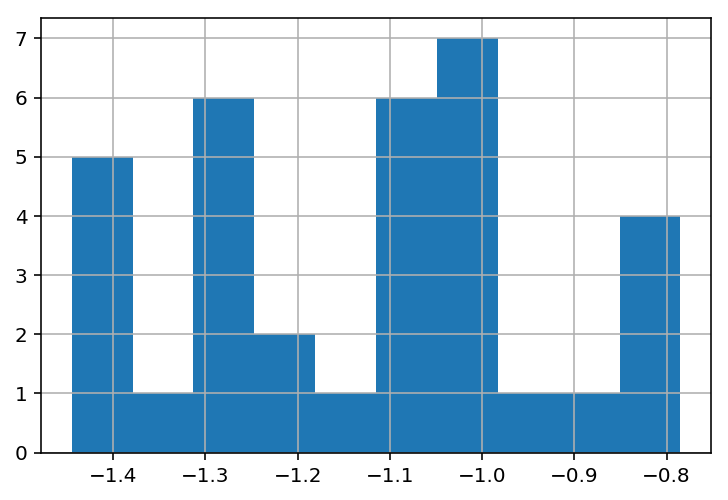

In [26]:
cycle2["br_norm"].hist()

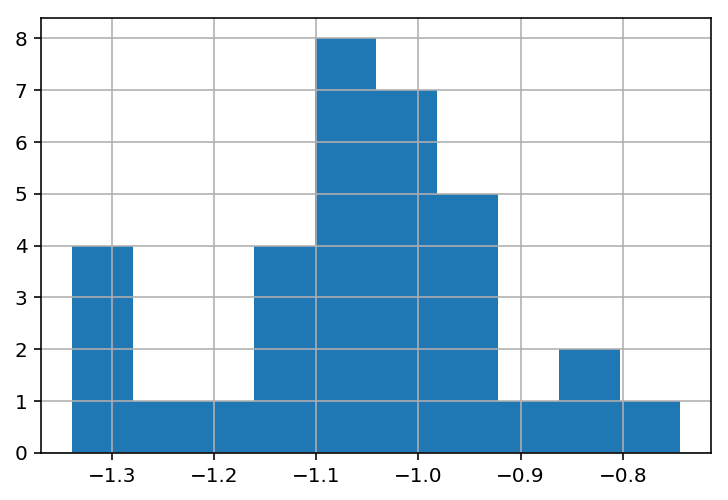

In [27]:
cycle1["br_norm"].hist()

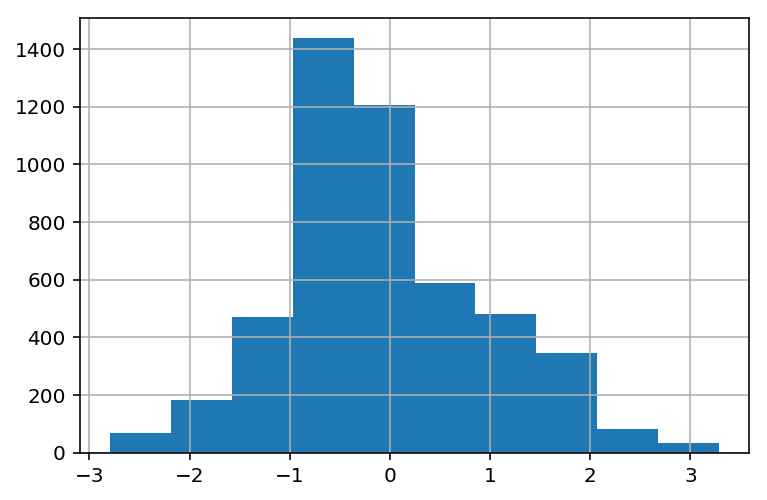

In [28]:
df["br_norm"].hist()

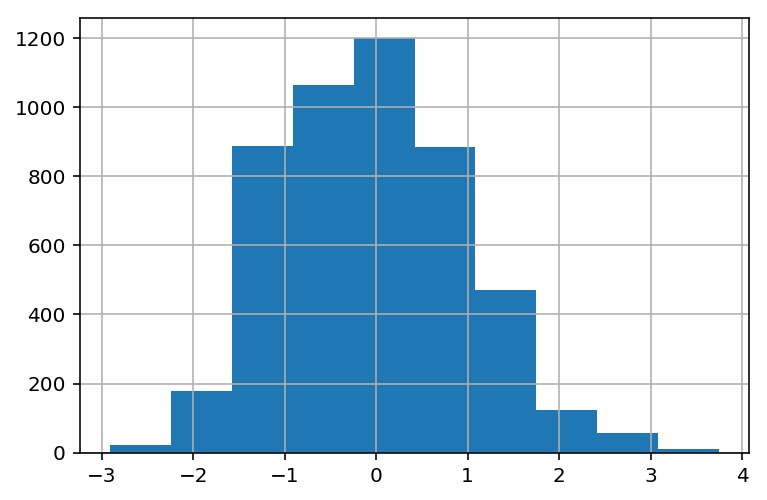

In [29]:
df["hr_norm"].hist()

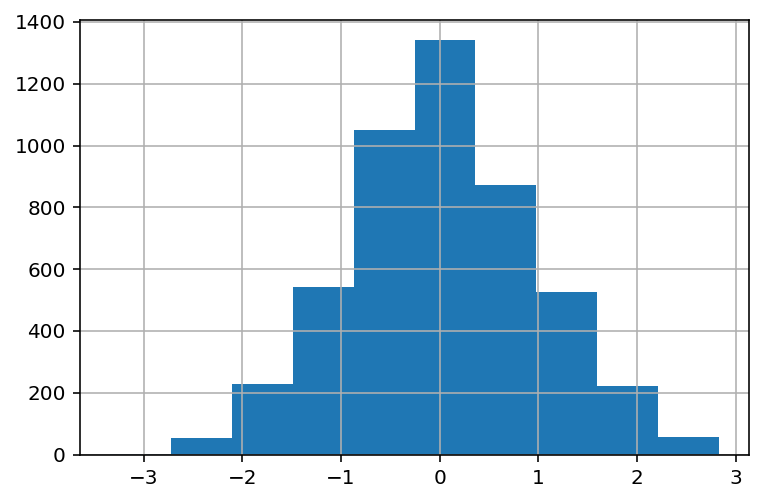

In [31]:
df["st_norm"].hist()